In [26]:
# Import libaries
from ema_workbench import Model, RealParameter, IntegerParameter, ScalarOutcome, ema_logging, perform_experiments
from ema_workbench.analysis import feature_scoring

import seaborn as sns
import matplotlib.pyplot as plt

# Import model from model.py
from model import AdaptationModel

In [27]:
# Define function to run model and return outcomes
def run_model(probability_of_network_connection, number_of_edges, number_of_nearest_neighbours, time_of_flooding, subsidie_level, information_bias):
    model = AdaptationModel(number_of_households=50, flood_map_choice="harvey", network="watts_strogatz", 
                            probability_of_network_connection=probability_of_network_connection,
                            number_of_edges=number_of_edges,
                            number_of_nearest_neighbours=number_of_nearest_neighbours,
                            time_of_flooding=time_of_flooding,
                            subsidie_level=subsidie_level,
                            information_bias=information_bias,
                            )
    for step in range(20):
        model.step()
    
    model_data = model.datacollector.get_model_vars_dataframe()

    return {
        "Total_adapted_households": model_data.iloc[-1]["Total_adapted_households"],
        "GovernmentSpendings": model_data.iloc[-1]["GovernmentSpendings"],
    }

In [28]:
ema_logging.LOG_FORMAT = "[%(name)s/%(levelname)s/%(processName)s] %(message)s"
ema_logging.log_to_stderr(ema_logging.INFO)

model = Model("ABModel", function=run_model)  # instantiate the model

# specify uncertainties
model.uncertainties = [
    RealParameter("probability_of_network_connection", 0.3, 0.5),
    IntegerParameter("number_of_edges", 2, 4),
    IntegerParameter("number_of_nearest_neighbours", 4, 6),
    IntegerParameter("time_of_flooding", 40, 80),
    IntegerParameter("subsidie_level", 0, 10000),
    RealParameter("information_bias", 0.0, 0.5)
]

# specify outcomes
model.outcomes = [
    ScalarOutcome("Total_adapted_households"),
    ScalarOutcome("GovernmentSpendings")
]

results = perform_experiments(model, 10)
results

[EMA.ema_workbench.em_framework.evaluators/INFO/MainProcess] performing 10 scenarios * 1 policies * 1 model(s) = 10 experiments
  0%|                                                   | 0/10 [00:00<?, ?it/s][EMA.ema_workbench.em_framework.evaluators/INFO/MainProcess] performing experiments sequentially


100%|██████████████████████████████████████████| 10/10 [00:40<00:00,  4.04s/it]
[EMA.ema_workbench.em_framework.evaluators/INFO/MainProcess] experiments finished


(   information_bias  number_of_edges  number_of_nearest_neighbours  \
 0          0.376544                2                             6   
 1          0.038365                2                             4   
 2          0.349931                4                             4   
 3          0.125090                2                             5   
 4          0.073381                3                             6   
 5          0.276501                4                             6   
 6          0.421960                3                             5   
 7          0.475096                2                             5   
 8          0.199194                3                             6   
 9          0.246542                4                             4   
 
    probability_of_network_connection  subsidie_level  time_of_flooding  \
 0                           0.477869            8852                40   
 1                           0.417802            7412              

In [29]:
experiments, outcomes = results
print(experiments.shape)
print(list(outcomes.keys()))

(10, 9)
['Total_adapted_households', 'GovernmentSpendings']


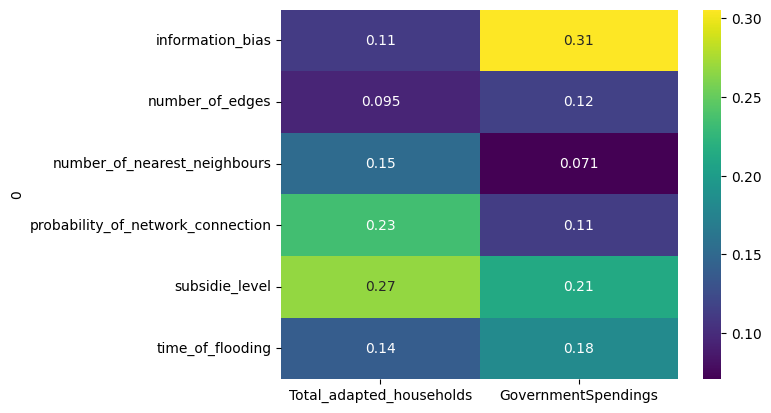

In [30]:
x = experiments
y = outcomes

fs = feature_scoring.get_feature_scores_all(x, y)
sns.heatmap(fs, cmap="viridis", annot=True)
plt.show()
# do not show this to the reader, put it in the appendix
# rather dive into one specific sensitivity
